<a href="https://colab.research.google.com/github/Zahra1725-dot/ML-Projects/blob/main/SVN_FazzyC_means_on_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install scikit-fuzzy

In [48]:
import skfuzzy as fuzz
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import load_breast_cancer

In [50]:
cancer= load_breast_cancer()

In [51]:
X=cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [52]:
X=X[:, :2] #mean radius و mean texture

In [53]:
X.shape

(569, 2)

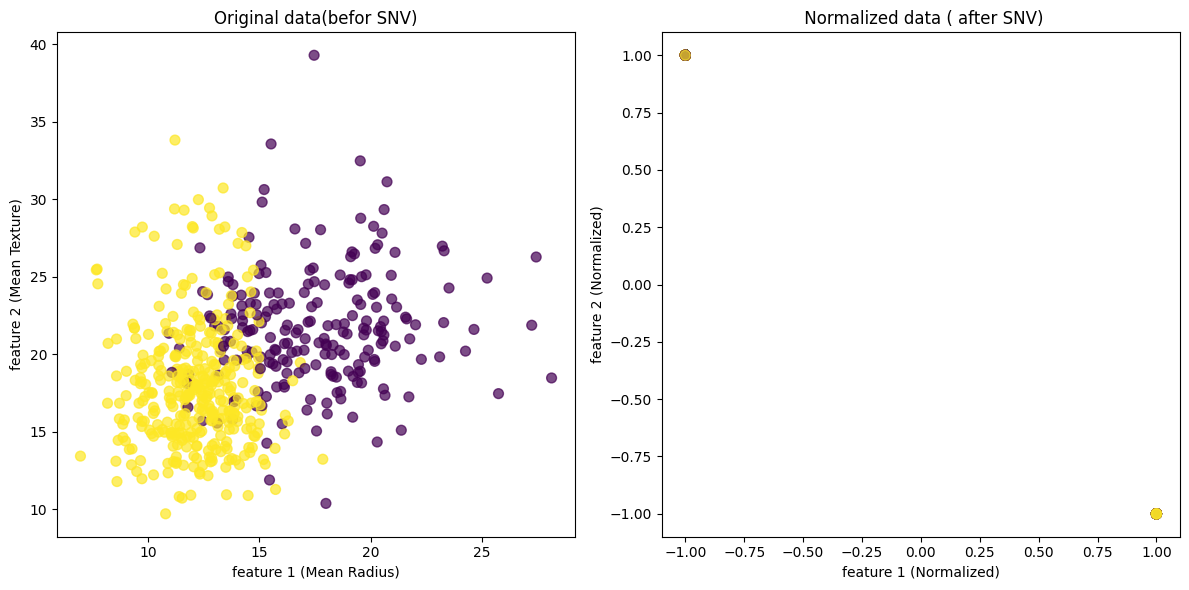

In [54]:
def snv_normalization(data):
    """
Normalize for every row
    """
    mean_data = data.mean(axis=1, keepdims=True)
    std_data = data.std(axis=1, keepdims=True)
    snv_data = (data - mean_data) / std_data
    return snv_data


X_normalized = snv_normalization(X)

#SNV
plt.figure(figsize=(12, 6))

# (Original data)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Original data(befor SNV)')
plt.xlabel('feature 1 (Mean Radius)')
plt.ylabel('feature 2 (Mean Texture)')

# (Normalized data)
plt.subplot(1, 2, 2)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title(' Normalized data ( after SNV)')
plt.xlabel('feature 1 (Normalized)')
plt.ylabel('feature 2 (Normalized)')

plt.tight_layout()
plt.show()

In [55]:
n_clusters=2
m=2.0
error=0.005
maxiter=1000

In [56]:
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(X.T, n_clusters, m, error, maxiter)

In [57]:
cluster_membership= np.argmax(u, axis=0)

In [ ]:
print("centers of recegnized clusters:\n", np.round(cntr, 2))
print("\membership_matrix (for first five samples):\n", np.round(u[:, :5], 3))

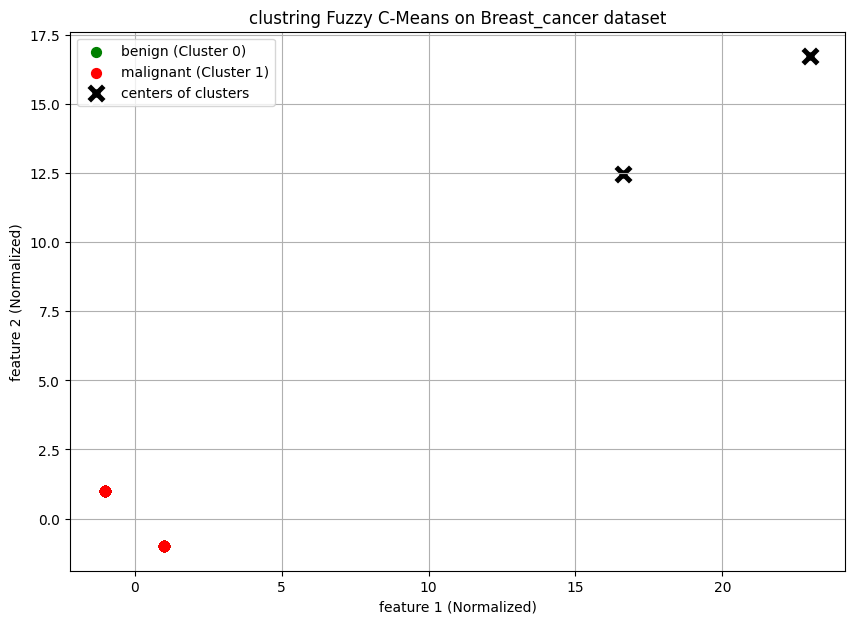


Examining the Membership Matrix (for borderline samples)
 Indices borderline samples: [ 45  50  99 115 121]
Values of membership for these samples:
[[0.54 0.49 0.46 0.49 0.5 ]
 [0.46 0.51 0.54 0.51 0.5 ]]


In [59]:
plt.figure(figsize=(10, 7))

#  plot data points
colors = ['green', 'red']
labels = ['benign (Cluster 0)', 'malignant (Cluster 1)']
for j in range(n_clusters):
    plt.scatter(X_normalized[cluster_membership == j, 0],
                X_normalized[cluster_membership == j, 1],
                s=50,
                color=colors[j],
                label=labels[j])

# plot centers of clusters
plt.scatter(cntr[0, :], cntr[1, :],
            marker='X', s=250, c='black', edgecolor='white', linewidth=2, label='centers of clusters')

plt.title('clustring Fuzzy C-Means on Breast_cancer dataset')
plt.xlabel('feature 1 (Normalized)')
plt.ylabel('feature 2 (Normalized)')
plt.legend()
plt.grid(True)
plt.show()


print("\nExamining the Membership Matrix (for borderline samples)")


fuzzy_points_indices = np.where((u[0] > 0.45) & (u[0] < 0.55))
print(" Indices borderline samples:", fuzzy_points_indices[0][:5])
print("Values of membership for these samples:")
print(np.round(u[:, fuzzy_points_indices[0][:5]], 2))

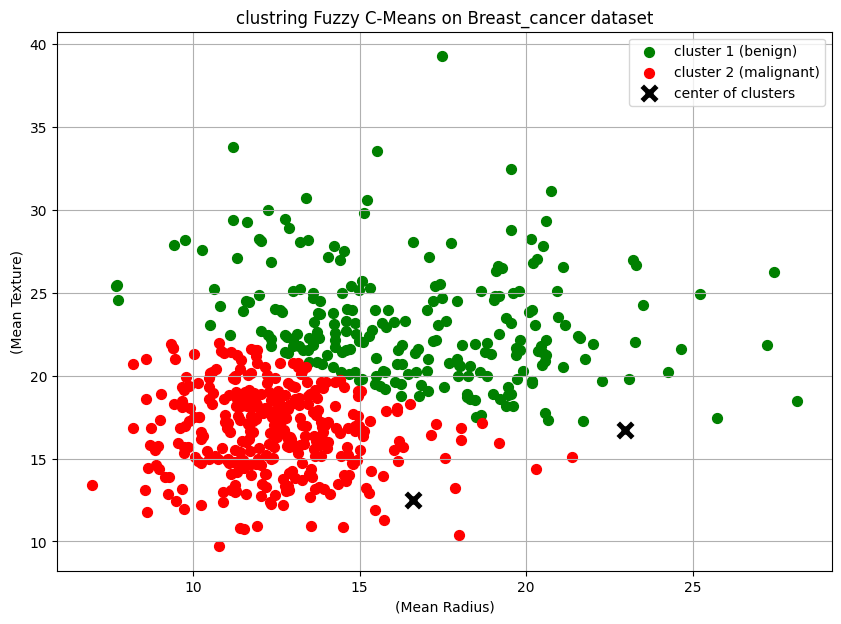

In [60]:
plt.figure(figsize=(10, 7))

colors = ['green', 'red']
labels = ['benign', 'malignant']
for j in range(n_clusters):
    plt.scatter(X[cluster_membership == j, 0],
                X[cluster_membership == j, 1],
                s=50,
                color=colors[j],
                label=f'cluster {j+1} ({labels[j]})')

plt.scatter(cntr[0, :], cntr[1, :],
            marker='X', s=250, c='black', edgecolor='white', linewidth=2, label='center of clusters ')

plt.title('clustring Fuzzy C-Means on Breast_cancer dataset')
plt.xlabel('(Mean Radius)')
plt.ylabel('(Mean Texture)')
plt.legend()
plt.grid(True)
plt.show()

print("\nExamining the Membership Matrix (for borderline samples:")
# Finding samples with a membership close to 0.5 in both clusters

fuzzy_points_indices = np.where((u[0] > 0.45) & (u[0] < 0.55))
print("Indices borderline samples:", fuzzy_points_indices[0][:5])
print("Values of membership for these samples:")
print(np.round(u[:, fuzzy_points_indices[0][:5]], 2))